# Сборный проект №1

**Описание проекта:**

Интернет-магазине «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Предоставлены данные до 2016 года, необходимо на их основе спланировать кампанию на 2017-ый.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**

Все данные содержатся в файле *games.csv*:
    - `Name` — название игры
    - `Platform` — платформа
    - `Year_of_Release` — год выпуска
    - `Genre` — жанр игры
    - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
    - `EU_sales` — продажи в Европе (миллионы проданных копий)
    - `JP_sales` — продажи в Японии (миллионы проданных копий)
    - `Other_sales` — продажи в других странах (миллионы проданных копий)
    - `Critic_Score` — оценка критиков (максимум 100)
    - `User_Score` — оценка пользователей (максимум 10)
    - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
**Основная цель проекта** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

## Шаг 0. Импорт и настройка библиотек

In [66]:
import pandas as pd
import numpy as np
import os

from scipy import stats as st

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)

def plot_describe (t, x_l, y_l): # Заранее пропишем функцию, подписывающую название графика и осей
    plt.title(t)                 # Здесь параметр t будет отвечать за название графика  
    plt.xlabel(x_l)              # Параметр x_l — за подпись горизонтальной оси
    plt.ylabel(y_l)              # Параметр y_l — за подпись вертикальной оси
    plt.show()

## Шаг 1. Загрузка и обзор данных

**Считаем csv-файл:**

In [2]:
pth1 = 'C:/pr/pr_4/games.csv' 
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
df.head(10) # Изучаем первые 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10) # Изучаем последние 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.info() # Изучаем общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe() # Изучаем описательные статистики данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.duplicated().sum() # Проверяем очевидные дубликаты (их нет)

0

**На данном этапе можем выделить следующие проблемы:**

- в данных очень много пропусков практически во всех столбцах;
- допущены стилистические ошибки в названиях столбцов;
- типы данных в столбцах могут быть оптимизированы;
- возможны неочевидные дубликаты в данных, требующие более тщательной проверки.

## Шаг 2. Предобработка данных

### 2.1. Исправление стилистических ошибок

**В первую очередь приведём названия всех столбцов к змеиному регистру:**

In [8]:
df.columns = df.columns.str.lower()

### 2.2. Обработка пропущенных значений

**Далее изучим имеющиеся в таблице пропуски и постараемся их заполнить:**

In [9]:
df.isna().sum().sort_values(ascending=False) # Находим количество пропусков в каждом столбце

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Наиболее просто разобраться с пропусками в столбцах *name* и *genre*. Рассмотрим эти пропуски детальнее:**

In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Такие данные не несут для нас пользы, так как неизвестны ни названия этих игр, ни их жанр, а, следовательно, ими можно пренебречь:**

In [11]:
df = df.dropna(subset=['name']).reset_index(drop=True) # Удаляем строки с пропусками
df['name'].isna().sum() # Проверяем, что количество пропусков в столбце *name* стало равно нулю

0

In [12]:
df['genre'].isna().sum() # Проверяем, что количество пропусков в столбце *genre* стало равно нулю

0

**Изучим строки с пропущенным годом выпуска игры:**

In [13]:
data = df[df['year_of_release'].isna()]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Для заполнения данных о дате релиза каждой игры на конкретной платформе сделаем следующее:**
- Оставим в данном датафрейме только первые три столбца.
- Сохраним этот датафрейм в отдельном csv-файле.
- Передадим этот csv-файл ИИ и попросим заполнить интересующие нас данные в столбце с пропусками.
- Заполненные пропуски запишем в виде объекта Series, после чего заполним этими данными столбец.

**Мотивация для такого решения:**
Такие данные довольно просто найти в открытом доступе, но перебирать 269 строк вручную выглядит энерго- и времязатратно. В то же время ИИ легко сможет сопоставить одни данные с другими и помочь нам в решении данной задачи. Так мы и заполним интересующие нас пропуски, и выполним нескучную побочную задачу.

In [14]:
data = data.drop(columns=['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                          'critic_score', 'user_score', 'rating']) # Отбрасываем из датафрейма все столбцы кроме первых трёх

In [15]:
data.to_csv('year_platform', index=False) # Сохраняем датафрейм в csv-файл

In [16]:
# Создаём объект Series, которому передаём полученные при помощи ИИ данные о годе выпуска каждой игры:
years_filled = [2003, 2003, 2008, 2005, 1980, 2007, 2001, 2008, 2006, 2007, 2010, 2007, 1998, 1980, 2008,
                1980, 2011, 2002, 2002, 2007, 1999, 1997, 1977, 2002, 2011, 2003, 2010, 2011, 2002, 2009,
                2011, 2006, 2002, 2011, 2008, 2008, 2004, 2010, 2011, 2005, 2011, 2006, 2002, 2011, 2008,
                2007, 2005, 2002, 2001, 2004, 2004, 1980, 2009, 2006, 1982, 2006, 1980, 2004, 1980, 2008,
                1978, 2008, 2010, 2011, 2002, 2011, 2001, 2008, 2008, 1980, 2007, 2002, 2002, 2006, 2011, 
                2013, 2010, 2004, 2002, 2010, 1980, 2004, 2002, 1979, 2004, 2010, 2002, 2007, 2007, 2005, 
                2005, 2005, 2004, 2004, 1985, 2011, 1982, 2006, 2008, 2011, 2005, 2011, 2006, 2010, 2010,
                2010, 2007, 2006, 2003, 2008, 2011, 2004, 1989, 1988, 2002, 2010, 2011, 2004, 2011, 2000,
                2013, 2011, 2012, 2006, 2010, 2001, 2011, 2004, 2006, 2010, 2010, 2001, 2001, 2010, 2001,
                2005, 2011, 1984, 2002, 2005, 2011, 2011, 2000, 2011, 2005, 2007, 2009, 2003, 2009, 2012, 
                2011, 2006, 2006, 2002, 2009, 2003, 2011, 2006, 2006, 2006, 2011, 2006, 2011, 2011, 2011, 
                2010, 2011, 2011, 2011, 2006, 2007, 2002, 2003, 2008, 2011, 2009, 2011, 2010, 2008, 2011, 
                2009, 2002, 2013, 2011, 2013, 2011, 2010, 2008, 2003, 2009, 2002, 2013, 2011, 2006, 2009,
                2009, 2006, 2010, 2007, 2006, 2010, 2011, 2003, 2006, 2011, 2008, 2011, 2009, 2008, 1999,
                2011, 2010, 2016, 1999, 2008, 2003, 2007, 2006, 2011, 2007, 2008, 2004, 2010, 2012, 2008, 
                2009, 2010, 2005, 2004, 2015, 2011, 2002, 2001, 2005, 2009, 2004, 2010, 2006, 2007, 2008, 
                2009, 2008, 2015, 2009, 2009, 2007, 2006, 2004, 2006, 2006, 2007, 2002, 2006, 2007, 2006, 
                2006, 2009, 2003, 2001, 2015, 2009, 2010, 2012, 2011, 2007, 2003, 2012, 2010, 2005]

In [17]:
df['year_of_release'] = df['year_of_release'].fillna(0) # Заполняем все пропуски в столбце с годом выпуска нулями

In [18]:
df.loc[df['year_of_release']==0, ['year_of_release']] = years_filled # Заменяем все нули на значения из сгенерированного списка

In [19]:
df['year_of_release'].isna().sum() # Проверяем, что количество пропусков стало равно нулю

0

**На всякий случай убедимся в том, что годы, сгенерированные ИИ, не выбраны рандомно, а соответствуют действительности. Для этого передадим значения списка *years_filled* значениям столбца *'year_of_release'* вспомогательного датафрейма *data* и ознакомимся с первыми значениями:**

In [20]:
data['year_of_release'] = years_filled
data.head(10)

,name,platform,year_of_release
183,Madden NFL 2004,PS2,2003
377,FIFA Soccer 2004,PS2,2003
456,LEGO Batman: The Videogame,Wii,2008
475,wwe Smackdown vs. Raw 2006,PS2,2005
609,Space Invaders,2600,1980
627,Rock Band,X360,2007
657,Frogger's Adventures: Temple of the Frog,GBA,2001
677,LEGO Indiana Jones: The Original Adventures,Wii,2008
718,Call of Duty 3,Wii,2006
804,Rock Band,Wii,2007


**И действительно, логика прослеживается: выход спортивных игр с числом "2004" в названии произошёл в 2003 году, игра на приставке Atari 2600 датируется 1980-ым годом, да и годы выпуска остальных игр при беглом поиске в интернете на поверку оказываются идентичными найденным при помощи ИИ. Так что пропуски в этом столбце можем считать заполненными.**

**Последние из оставшихся пропусков — пропуски в столбцах *critic_score*, *user_score* и *rating*. Рассмотрим каждый из них:**
- critic_score, user_score — для более старых игр пропуски могут быть обоснованы тем, что они попросту не оценивались по каким-то шкалам в то время. Более новые же игры с малым числом продаж могли ускользнуть от внимания критиков, не попасть в рейтинги игроков и т. п. Заполнить данные пропуски стандартными методами (при помощи среднего, медианы или другой характеристики) не представляется возможным ввиду субъективности выставления данных оценок как критиками, так и пользователями. Поэтому для того, чтобы обрабатывать эти данные всё же было возможно, мы заполним все пропуски значением -1 (так мы не вызовем случайного перемешивания подобных данных с остальными, у которых рейтинг колеблется от 0 до 10).
- rating — ситуация аналогична описанной выше. ESRB как организация была основана в 1994 году и, вероятно, не сразу и не всем играм стала выдавать рейтинги (в особенности — вышедшим до 1994 года). Заполним данные пропуски значением 'NR' (no rating).

In [21]:
df['critic_score'] = df['critic_score'].fillna(-1) # Заполняем пропуски минус единицами
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('NR')           # Заполняем пропуски значением 'NR'
display(df['critic_score'].isna().sum()) # Проверяем, что количество пропусков стало равно нулю
display(df['user_score'].isna().sum())
display(df['rating'].isna().sum())

0

0

0

In [22]:
df.isna().sum().sort_values(ascending=False) # Все пропуски обработаны

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 2.3. Изменение типов данных столбцов

**Обратим внимание на то, что тип столбца *'user_score'* в отличие от *'critic_score'* — *object*, что подразумевает наличие нечисловых значений. Изучим уникальные значения в данном столбце:**

In [23]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**В глаза бросается значение *'tbd'*. Согласно FAQ Metacritic'a, данную аббревиатуру можно расшифровать как 'To Be Determined', что дословно можно перевести как "будет определено". Таким образом, можем заключить, что такого рода значения на данный момент не определены, а, следовательно, являются неявными пропусками. Обработаем их по тому же принципу, что и до этого (а именно — заменим данные значения минус единицами), а также изменим тип столбца на числовой:**

In [24]:
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].astype('float')

**Также странно видеть значение *float* у столбца с годом выпуска игры, так как год не может быть дробным числом. Изменим его тип на целочисленный:**

In [25]:
df['year_of_release'] = df['year_of_release'].astype('int32')

### 2.4. Обработка неявных дубликатов

**Проверим, нет ли у нас таких игр, для которых повторяются название, платформа и год выпуска одновременно, и, если такие игры есть, удалим дублирующиеся данные:**

In [26]:
display(df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4126,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


### 2.5. Добавление нового столбца

**На дальнейших этапах анализа нам понадобится столбец с суммарными продажами во всех регионах. Добавим его на этом шаге:**

In [27]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Выведем ещё раз общую информацию о данных и первые 10 строк таблицы:**

In [28]:
display(df.head(10))
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NR,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NR,28.31


<class 'pandas.core.frame.DataFrame'>
Index: 16711 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int32  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     16711 non-null  float64
 9   user_score       16711 non-null  float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### 2.6. Промежуточные выводы

**На этом шаге были:**
- Исправлены стилистические ошибки в названиях столбцов — все названия приведены к нижнему регистру.
- Обработаны пропущенные значения:
    - игры без названия — удалены;
    - игры без года выпуска — заполнены пропавшими значениями при помощи ИИ;
    - игры без рейтинга — получили рейтинг 'NR' (no rating);
    - игры без оценок от игроков и критиков — получили оценку -1.
- Изменены типы данных в столбцах — столбец *'year_of_release'* теперь имеет тип *int*, а столбец *'user_score'* — тип *'float'*.
- Удалены неявные дубликаты.

Также добавлен вспомогательный столбец *'total_sales'*, содержащий данные о суммарных продажах во всех регионах.

## Шаг 3. Исследовательский анализ данных

**На данном шаге ответим на несколько ключевых для данного анализа вопросов**

### 3.1. Количество игр, выпущенных в разные годы

**Изучим количество игр, которые были выпущены в разные годы:**

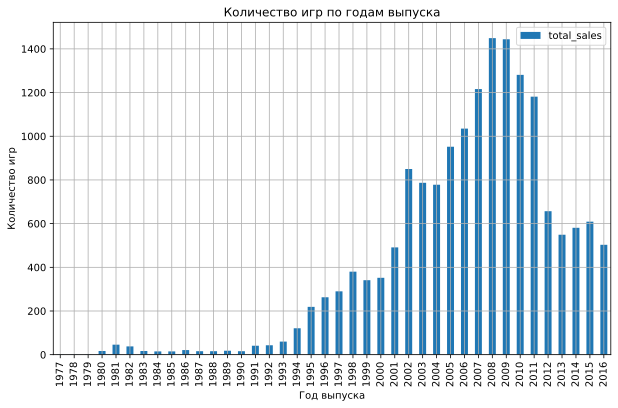

In [29]:
(df
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
    .plot(kind='bar', grid=True)
)
plot_describe('Количество игр по годам выпуска', 'Год выпуска', 'Количество игр')

**Промежуточный вывод:**

До 1994 года количество игр было крайне мало в сравнении с последующими годами, поэтому данный период не столь интересен в рамках данного анализа. Намного более интересны данные после 1994 года, начиная с которого начался стремительный рост интереса к гейм-индустрии, а также повысилась доступность игр для пользователей ввиду выхода их на компьютерах и приставках по типу PlayStation и Xbox. Расцвет индустрии пришёлся на 2002-2011-ый годы (пиковыми можно назвать 2008-2009-ый годы). Начиная же с 2012-го года спрос на компьютерные игры заметно упал (вероятно, ввиду развития социальных сетей и мобильных устройств), что привело и к снижению "предложения" от издателей.

### 3.2. Продажи по платформам в разные годы

**Изучим количество игр, выпущенных на каждой из платформ:**

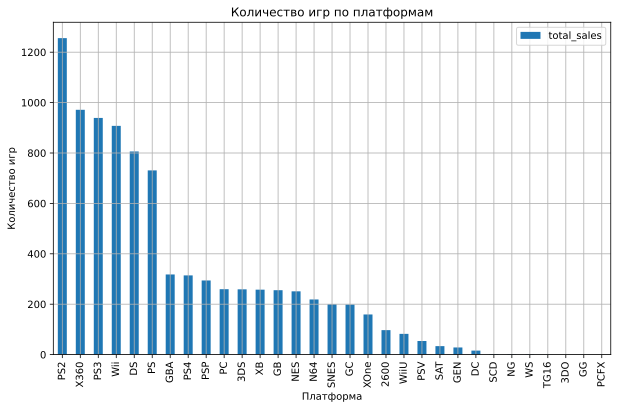

In [30]:
(df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True)
)
plot_describe('Количество игр по платформам', 'Платформа', 'Количество игр')

**Промежуточный вывод:**

Наиболее популярной из платформ является культовая PS2, что, в целом, ожидаемо для рассматриваемого периода. Следом в тройке лидеров расположились Xbox 360 и PS3. Замыкают же список преимущественно приставки японского производства, характерные для периода 80-90-ых годов (что коррелирует с выводами из пункта 3.1)

### 3.3. Продолжительность жизни платформ

**Выясним, за какой характерный срок появляются новые и исчезают старые платформы:**

In [44]:
life_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']) # Создаём сводную таблицу
life_time = life_time.set_axis(['first_year', 'last_year'], axis='columns') # Переименовываем столбцы
life_time['lifespan'] = life_time['last_year'] - life_time['first_year'] + 1 # Вычисляем продолжительность жизни каждой платформы
display(life_time['lifespan'].describe())
life_time.sort_values(by='lifespan', ascending=False).head()

count    31.000000
mean      8.903226
std       7.058587
min       1.000000
25%       4.000000
50%       8.000000
75%      12.000000
max      32.000000
Name: lifespan, dtype: float64

,first_year,last_year,lifespan
platform,,,
PC,1985,2016,32
DS,1985,2013,29
GB,1988,2001,14
2600,1977,1989,13
Wii,2004,2016,13


**Промежуточный вывод:**

Средняя продолжительность жизни платформы составляет почти 9 лет, а медианная равна 8-ми годам. Самая долгоживущая платформа — персональный компьютер (который, впрочем, вряд ли "выйдет из моды" в обозримом будущем). Пик популярности платформы приходится примерно на середину срока её жизни, т. е. наступает в течение 4-5 лет с даты её выхода, после чего популярность идёт на спад. Поэтому в рамках данного анализа будем ориентироваться на то, что (за вычетом редких исключений) продажи для платформ старше 10 лет в грядущем году будут довольно низкими. Наибольшие же продажи ожидаются у игр, выходящих на тех платформах, которые вышли 4-5 лет тому назад (на момент 2016 года к таким можно отнести PS4, Xbox One и WiiU). В связи с этим для дальнейшего рассмотрения мы возьмём **актуальный период в 5 лет, то есть период с 2012-го по 2016-ый годы.**

### 3.4. Динамика продаж игр по платформам

**Для визуализации динамики продаж игр по платформам выделим Топ-5 платформ с наибольшими суммарными продажами за последние 5 лет:**

In [45]:
df = df[df['year_of_release'] >= 2012].reset_index()
df.groupby('platform').sum()[['total_sales']].sort_values(by='total_sales', ascending=False).reset_index().head()

,platform,total_sales
0,PS4,314.14
1,PS3,288.98
2,X360,236.65
3,3DS,194.85
4,XOne,159.32


**На основе этих данных построим график распределения продаж по годам:**

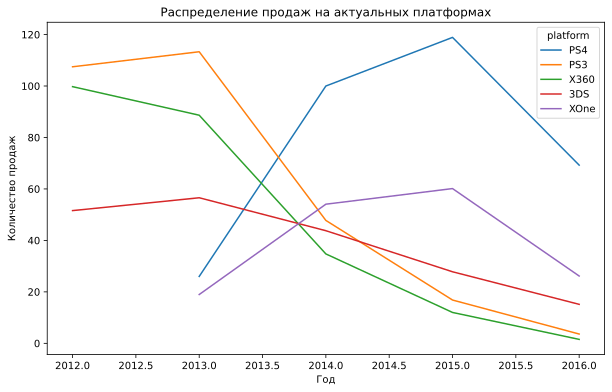

In [46]:
df_top = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_top = df_top[['PS4', 'PS3', 'X360', '3DS', 'XOne']]
df_top.plot()
plot_describe('Распределение продаж на актуальных платформах', 'Год', 'Количество продаж')

**Также построим диаграммы размаха продаж по данным платформам за актуальный период:**

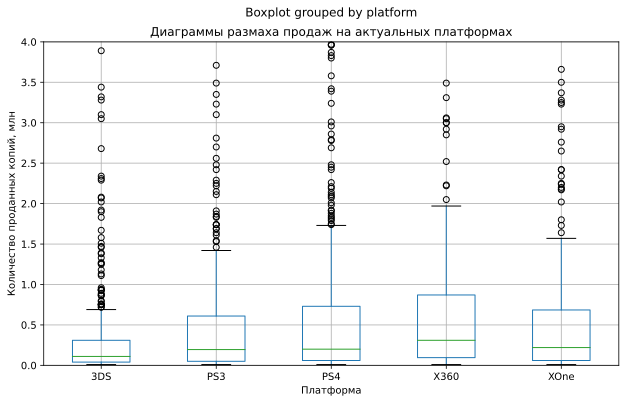

In [47]:
(df.query('platform in ["PS4", "PS3", "X360", "3DS", "XOne"]')[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform')
)
plt.ylim(0, 4)
plot_describe('Диаграммы размаха продаж на актуальных платформах', 'Платформа', 'Количество проданных копий, млн')

**Промежуточный вывод:**

По представленным данным можно заметить, что в рассматриваемом нами актуальном периоде стремительно растут продажи игр на таких платформах как XBox One и PlayStation 4 (являющейся также лидером продаж). В то же время продажи игр на выходящих из оборота PlayStation 3, XBox 360 и Nintendo 3DS столь же стремительно падают, хоть по суммарным значениям за рассматриваемый период всё ещё обгоняют пресловутый XBox One, замыкающий топ-5 лидеров продаж.

### 3.5. Влияние отзывов на продажи

**Наиболее интересной в нашем рассмотрении является платформа PS4, поэтому в этом разделе мы на её примере изучим влияние отзывов пользователей и критиков на продажи. Для этого сперва выделим в отдельный датафрейм данные об играх, вышедших в актуальном периоде на данной консоли, которые, к тому же, имеют оценки игроков и критиков большие нуля:**

In [48]:
df_ps4 = df[(df['platform'] == 'PS4') & (df['critic_score'] > 0) & (df['user_score'] > 0)]

**Далее построим диаграммы рассеяния зависимостей общей суммы продаж игр от оценок критиков и игроков:**

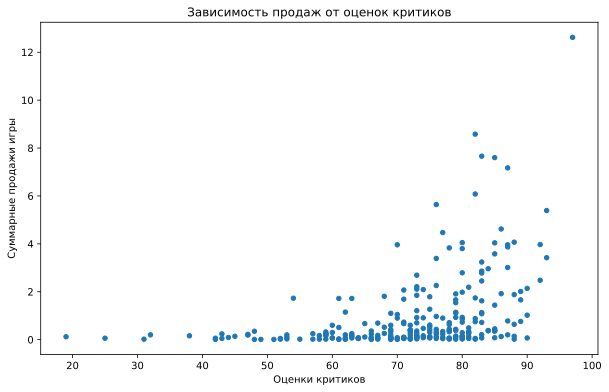

In [49]:
df_ps4.plot(kind='scatter', x='critic_score', y='total_sales')
plot_describe('Зависимость продаж от оценок критиков', 'Оценки критиков', 'Суммарные продажи игры')

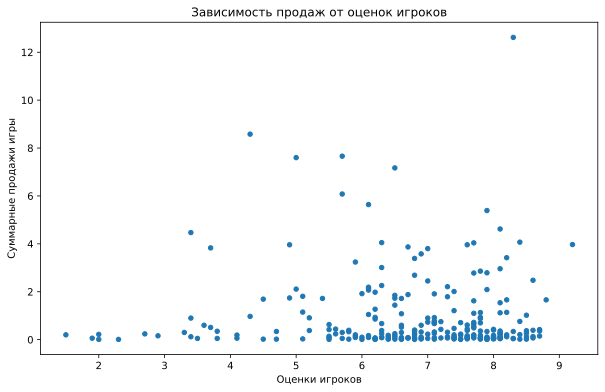

In [50]:
df_ps4.plot(kind='scatter', x='user_score', y='total_sales')
plot_describe('Зависимость продаж от оценок игроков', 'Оценки игроков', 'Суммарные продажи игры')

**Также найдём коэффициент корреляции Пирсона для таких параметров как оценки и продажи:**  

In [51]:
display(df_ps4['user_score'].corr(df_ps4['total_sales']).round(2))
df_ps4['critic_score'].corr(df_ps4['total_sales']).round(2)

-0.03

0.41

**Промежуточный вывод:**

Можем заметить, что с увеличением среднего рейтинга критиков растёт и уровень выручки с продаж игры, чего нельзя сказать о взаимосвязи выручки с рейтингом игроков. Поэтому при оценке потенциальных продаж всё же немного надёжнее полагаться на предварительные оценки критиков, хоть корреляция с выручкой и не является сильной.
Также необходимо заметить, что на выручку оказывает влияние ещё немалое количество факторов, не рассматриваемых нами в рамках данного анализа. К их числу можно отнести, например:
- эксклюзивы для определённой платформы;
- выходящие новые части популярных серий игр (таких как GTA или Call of Duty);
- репутацию того или иного издателя в геймерской среде.

**Изучим величину корреляции для других популярных платформ:**

In [52]:
df_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0) & (df['user_score'] > 0)] # PlayStation 3
display(df_ps3['user_score'].corr(df_ps3['total_sales']).round(2))
df_ps3['critic_score'].corr(df_ps3['total_sales']).round(2)

0.0

0.33

In [53]:
df_x360 = df[(df['platform'] == 'X360') & (df['critic_score'] > 0) & (df['user_score'] > 0)] # Xbox 360
display(df_x360['user_score'].corr(df_x360['total_sales']).round(2))
df_x360['critic_score'].corr(df_x360['total_sales']).round(2)

0.0

0.36

In [54]:
df_3ds = df[(df['platform'] == '3DS') & (df['critic_score'] > 0) & (df['user_score'] > 0)] # Nintendo 3DS
display(df_3ds['user_score'].corr(df_3ds['total_sales']).round(2))
df_3ds['critic_score'].corr(df_3ds['total_sales']).round(2)

0.2

0.31

In [55]:
df_x_one = df[(df['platform'] == 'XOne') & (df['critic_score'] > 0) & (df['user_score'] > 0)] # Xbox One
display(df_x_one['user_score'].corr(df_x_one['total_sales']).round(2))
df_x_one['critic_score'].corr(df_x_one['total_sales']).round(2)

-0.09

0.41

**Наши предыдущие выводы подтверждаются несмотря на небольшие различия в коэффициентах корреляции.**

### 3.6. Распределение игр по жанрам

**Посмотрим на то, как вышедшие игры распределены по жанрам:**

In [56]:
df_genre = df.pivot_table(index='genre', values='total_sales', columns='year_of_release', aggfunc='sum', margins=True).reset_index()
df_genre = df_genre[:-1]
df_genre = df_genre.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)
df_genre

index,2012,2013,2014,2015,2016,All
genre,,,,,,
Action,119.25,123.14,97.23,72.02,30.11,441.75
Shooter,71.77,62.04,65.21,67.54,38.22,304.78
Role-Playing,46.94,44.45,45.62,37.64,18.18,192.83
Sports,30.41,41.17,45.15,40.86,23.49,181.08
Misc,22.22,25.27,23.38,11.57,2.60,85.04
Platform,18.37,24.54,8.81,6.05,3.23,61.00
Racing,13.61,12.37,16.66,8.07,2.79,53.50
Fighting,9.18,7.09,15.85,7.90,4.47,44.49
Simulation,13.55,8.77,5.58,5.66,1.89,35.45


**Самые популярные жанры — экшен, шутеры, RP и спортивные игры. Однако в данной ситуации важно посмотреть не только на суммарные продажи, но и на другие описательные статистики (такие, например, как среднее и медиана). Для этого построим диаграммы размаха для каждого жанра, а также соберём наиболее интересные из статистик в одну таблицу:**

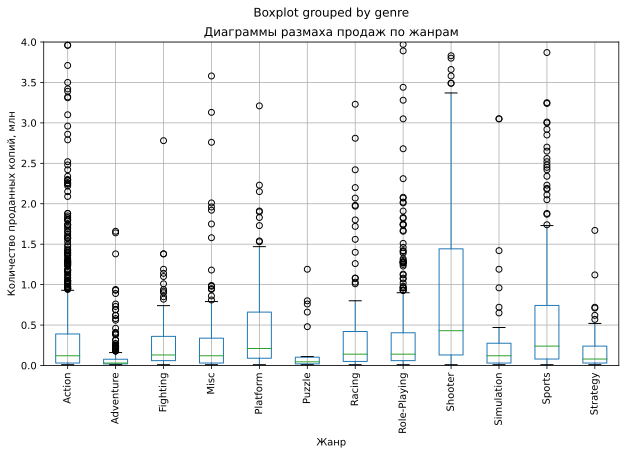

In [57]:
df[['total_sales', 'genre']].boxplot(column='total_sales', by='genre')
plt.ylim(0, 4)
plt.tick_params('x', rotation=90)
plot_describe('Диаграммы размаха продаж по жанрам', 'Жанр', 'Количество проданных копий, млн')

In [58]:
(df.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
   .reset_index().sort_values(('median', 'total_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,304.78,1.280588,0.430,2.241938,238
10,Sports,181.08,0.675672,0.240,1.136357,268
4,Platform,61.00,0.717647,0.210,1.364413,85
7,Role-Playing,192.83,0.519757,0.140,1.314405,371
6,Racing,53.50,0.465217,0.140,0.888664,115
2,Fighting,44.49,0.408165,0.130,0.910385,109
0,Action,441.75,0.427224,0.120,1.164883,1034
3,Misc,85.04,0.442917,0.120,1.081047,192
9,Simulation,35.45,0.427108,0.120,1.223132,83


**Промежуточный вывод:**

Несмотря на почти что полуторакратное превосходство в суммарном количестве продаж, в среднем экшен-игры продаются довольно средне. Обосновано это, вероятно, большим количеством игр данного жанра — их количество практически втрое больше ближайшего конкурента — игр жанра RPG. Более стабильно себя показывают шутеры и спортивные игры, входящие в топ игр как по суммарным, так и по средним продажам. Печальнее же всего ситуация обстоит с играми жанра паззл и стратегиями, что, опять же, объяснимо сравнительно малым количеством выпускаемых под топовые консоли продуктов, а также отсутствием "хитов", сопоставимых с оными в "топовых" жанрах.

### 3.7. Общий вывод

- До 1994 года количество игр было крайне мало. Расцвет индустрии пришёлся на 2002-2011-ый годы (пиковые — 2008-2009-ый годы). Начиная с 2012-го года спрос на компьютерные игры заметно упал (вероятно, ввиду развития социальных сетей и мобильных устройств).
- Наиболее популярная из платформ — PS2. Следом расположились Xbox 360 и PS3. Замыкают список преимущественно приставки японского производства, характерные для периода 80-90-ых годов.
- Средняя продолжительность жизни платформы составляет почти 9 лет, а медианная равна 8-ми годам. Самая долгоживущая платформа — персональный компьютер (32 года). Пик популярности платформы приходится примерно на середину срока её жизни, после чего популярность идёт на спад. В связи с этим был выбран **актуальный период продолжительностью в 5 лет, то есть период с 2012-го по 2016-ый годы.**
- В рассматриваемом актуальном периоде стремительно растут продажи игр на платформах XBox One и PlayStation 4 (являющейся также лидером продаж). Продажи игр на выходящих из оборота PlayStation 3, XBox 360 и Nintendo 3DS столь же стремительно падают.
- С увеличением среднего рейтинга критиков растёт и уровень выручки с продаж игры (про рейтинг игроков такого сказать нельзя). Поэтому при оценке потенциальных продаж всё же немного надёжнее полагаться на предварительные оценки критиков, хоть корреляция с выручкой и не является сильной.
- Самые популярные жанры — экшен, шутеры, RPG и спортивные игры. Однако, по показателям средней выручки лидируют шутеры и спортивные игры. Замыкают рейтинги как по суммарным, так и по средним продажам паззлы и стратегии.

## Шаг 4. Составление портретов пользователей

### 4.1. Популярность платформ в различных регионах

**Определим наиболее популярные для каждого региона платформы:**

In [59]:
na_top_platform = (
    df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
)
na_top_platform['ratio'] = (na_top_platform['na_sales'] / na_top_platform['na_sales'].sum()).round(2)

eu_top_platform = (
    df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
)
eu_top_platform['ratio'] = (eu_top_platform['eu_sales'] / eu_top_platform['eu_sales'].sum()).round(2)

jp_top_platform = (
    df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
)
jp_top_platform['ratio'] = (jp_top_platform['jp_sales'] / jp_top_platform['jp_sales'].sum()).round(2)

display(na_top_platform, eu_top_platform, jp_top_platform)

,na_sales,ratio
platform,,
X360,140.12,0.28
PS4,108.74,0.22
PS3,103.53,0.21
XOne,93.12,0.19
3DS,55.49,0.11


,eu_sales,ratio
platform,,
PS4,141.09,0.34
PS3,106.85,0.26
X360,74.55,0.18
XOne,51.59,0.12
3DS,42.64,0.10


,jp_sales,ratio
platform,,
3DS,87.84,0.51
PS3,35.32,0.20
PSV,21.04,0.12
PS4,15.96,0.09
WiiU,13.01,0.08


**Промежуточный вывод:**

Вкусы игроков в Европе и в Северной Америке схожи: списки наиболее популярных платформ здесь состоят из одних и тех же консолей, но отличаются очередностью в списке. В Америке преобладают консоли Xbox 360 (их доля порядка четверти от обшего количества), в Европе — PlayStation 4 (доля порядка трети от общего количества). В Японии же с заметным отрывом лидирует "отечественный" производитель — здесь наиболее популярна мобильная консоль Nintendo 3DS (её доля составляет почти половину от общего количества). Что интересно: консоль Xbox здесь даже не вошла в топ-5.

### 4.2. Популярность жанров в различных регионах

**Определим наиболее популярные для каждого региона жанры:**

In [60]:
na_top_genre = (
    df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
)
eu_top_genre = (
    df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
)
jp_top_genre = (
    df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
)
display(na_top_genre, eu_top_genre, jp_top_genre)

,na_sales
genre,
Action,177.92
Shooter,144.79
Sports,81.53
Role-Playing,64.00
Misc,38.19


,eu_sales
genre,
Action,159.82
Shooter,113.50
Sports,69.08
Role-Playing,48.53
Racing,27.29


,jp_sales
genre,
Role-Playing,65.47
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


**Промежуточный вывод:**

И вновь список топ-5 популярных жанров в Северной Америке и Европе практически идентичен (на этот раз вплоть до порядка). Наиболее востребованы в этих регионах экшены, шутеры и спортивные игры. В Японии же экшены только на втором месте по популярности, а лидируют игры жанра RPG.

Данные различия обусловлены множеством факторов, включая культурные, исторические и социальные аспекты. Разберём часть из них:
- **Исторический контекст** — в начале развития видеоигр в 80-х и 90-х годах, США и Европа активно развивали аркадные игры, которые в значительной степени определили популярность экшен и шутеров. Такие игры, как "Doom" и "Wolfenstein 3D", стали знаковыми хитами, что привело к росту популярности жанров.
- **Влияние кино и медиакультуры** — в Америке экшен-кино занимало важное место в культуре, а видеоигры стали отражать эту тенденцию. Фильмы о супергероях и боевиках, такие как серии "Миссия невыполнима" или "Терминатор", вдохновили разработчиков игр создавать экшен и шутеры.
- **Японская культура и философия** — Япония, в отличие от Запада, имеет более глубокие традиции нарративного повествования и часто опирается на мифологии, истории и культуры своей страны. RPG игры, такие как "Final Fantasy" или "Dragon Quest", погружают игроков в богатые сюжетные линии и детализированные миры, что отражает японский подход к повествованию.
- **Предпочтения в восприятии** — западные игроки склонны ориентироваться на игровой процесс, динамику и немедленное удовлетворение от игры, что характерно для экшен-жанров. В Японии же игра является не только развлечением, но и способом погружения в новые миры и истории, что делает RPG предпочтительным выбором.

### 4.3. Влияние рейтинга ESRB на продажи в различных регионах

**Посмотрим, как влияет рейтинг ESRB на продажи игр в различных регионах.**

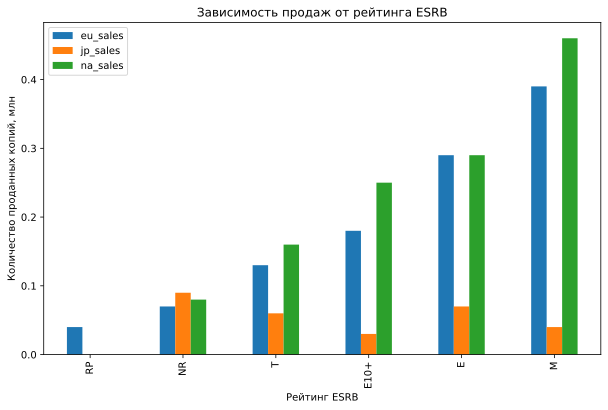

In [61]:
rating_pivot = (
    df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales').round(2)
)
rating_pivot.plot(kind='bar')
plot_describe('Зависимость продаж от рейтинга ESRB', 'Рейтинг ESRB', 'Количество проданных копий, млн')

In [62]:
rating_pivot['eu_ratio'] = (rating_pivot['eu_sales'] / rating_pivot['eu_sales'].sum()).round(2)
rating_pivot['na_ratio'] = (rating_pivot['na_sales'] / rating_pivot['na_sales'].sum()).round(2)
rating_pivot['jp_ratio'] = (rating_pivot['jp_sales'] / rating_pivot['jp_sales'].sum()).round(2)
rating_pivot = rating_pivot[['eu_sales', 'eu_ratio', 'na_sales', 'na_ratio', 'jp_sales', 'jp_ratio',]]
rating_pivot

,eu_sales,eu_ratio,na_sales,na_ratio,jp_sales,jp_ratio
rating,,,,,,
RP,0.04,0.04,0.00,0.00,0.00,0.00
NR,0.07,0.06,0.08,0.06,0.09,0.31
T,0.13,0.12,0.16,0.13,0.06,0.21
E10+,0.18,0.16,0.25,0.20,0.03,0.10
E,0.29,0.26,0.29,0.23,0.07,0.24
M,0.39,0.35,0.46,0.37,0.04,0.14


**Промежуточный вывод:**

Популярность игр с различными рейтингами ESRB снова отличается для Запада и Востока. В регионах Северной Америки и Европы более востребованы игры для лиц старше 16-ти лет, тогда как в Японии большинство игр в принципе не имеют рейтинга. Это может быть связано с тем, что рейтинг ESRB как таковой изначально предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики) и, как следствие, популярным исключительно в Японии играм данный рейтинг мог попросту не присваиваться.

### 4.4. Общий вывод

Вкусы игроков в Европе и в Северной Америке довольно схожи: списки наиболее популярных платформ, жанров и рейтингов игр здесь практически идентичны и в редких случаях различаются разве что порядком следования пунктов в них. **Самые популярные платформы** для этих регионов —  **Xbox 360 для Америки и PlayStation 4 для Европы; жанры — экшен, шутер и спортивные игры для обоих регионов; игры рейтинга ESBR — для лиц старше 16-ти лет также для обоих регионов.**
**В Японии** же кардинально другая картина: здесь **наиболее популярна мобильная консоль Nintendo 3DS** (её доля составляет почти половину от общего количества), **преобладающий жанр в играх — RPG, а большинство игр в принципе не имеют рейтинга ESBR**.
Данные различия обусловлены множеством факторов, включая культурные, исторические и социальные аспекты рассматриваемых регионов.

## 5. Проверка гипотез

**На этом шаге мы проверим несколько гипотез, которые помогут нам провести более точное статистическое сравнение популярных платформ и игровых жанров.**

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем нулевую и альтернативную гипотезы:**

- **H0:** Средние пользовательские рейтинги платформ Xbox One и PC не отличаются.
- **H1:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

**Для подтверждения (или же опровержения) нулевой гипотезы воспользуемся двухвыборочным t-тестом для двух независимых выборок x_one и pc, так как нам надо проверить гипотезу о равенстве средних двух генеральных совокупностей:**

In [63]:
def hyp (res): # Создадим вспомогательную функцию для проверки гипотез
    alpha = 0.05 # Зададим уровень статистической значимости
    print('p-значение:', res.pvalue)
    if res.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [67]:
x_one = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc =  df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']

results = st.ttest_ind(x_one, pc, equal_var=False)
hyp(results)

p-значение: 0.5582859272842213
Не получилось отвергнуть нулевую гипотезу


In [68]:
print('Средняя оценка пользователей игр для платформы Xbox One — {:.2f}'.format(x_one.mean()))
print('Средняя оценка пользователей игр для платформы PC — {:.2f}'.format(pc.mean()))

Средняя оценка пользователей игр для платформы Xbox One — 6.52
Средняя оценка пользователей игр для платформы PC — 6.43


**Отвергнуть нулевую гипотезу не получилось:** Средняя оценка пользователей для платформы Xbox One равна 6.52, а для пользователей PC — 6.43. Как можно видеть, это отличие недостаточно велико для того, чтобы отвергнуть нулевую гипотезу.. Следовательно, можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

### Гипотеза 2. Средние пользовательские рейтинги жанров экшен и спортивных игр разные

**Сформулируем нулевую и альтернативную гипотезы:**

- **H0:** Средние пользовательские рейтинги жанров экшен и спортивных игр не отличаются.
- **H1:** Средние пользовательские рейтинги жанров экшен и спортивных игр отличаются.

**Для подтверждения (или же опровержения) нулевой гипотезы воспользуемся двухвыборочным t-тестом для двух независимых выборок action и sports, так как нам надо проверить гипотезу о равенстве средних двух генеральных совокупностей:**

In [69]:
action = df.query('genre == "Action"')['user_score']
sports = df.query('genre == "Sports"')['user_score']

results = st.ttest_ind(action, sports, equal_var=False)
hyp(results)

p-значение: 0.0033356224800449447
Отвергаем нулевую гипотезу


In [70]:
print('Средняя оценка пользователей игр жанра экшен — {:.2f}'.format(action.mean()))
print('Средняя оценка пользователей спортивных игр — {:.2f}'.format(sports.mean()))

Средняя оценка пользователей игр жанра экшен — 2.98
Средняя оценка пользователей спортивных игр — 3.67


**Нулевая гипотеза не подтвердилась:** Средние пользовательские рейтинги жанров экшен и спортивных игр действительно различны и ориентировочно составляют 2.98 и 3.67 соответственно. Это отличие достаточно велико для того, чтобы отвергнуть нулевую гипотезу. Следовательно, можем сделать вывод, что средние пользовательские рейтинги жанров экшен и спортивных игр различны.

### Промежуточный вывод

**При заданном уровне статистической значимости α = 0.05 была подтверждена гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Также не удалось подтвердить нулевую гипотезу о том, что средние пользовательские рейтинги жанров экшен и спортивных игр тоже одинаковы, ввиду чего сделан вывод о том, что они различны.**

## 6. Вывод

- До 1994 года количество игр было крайне мало. Расцвет индустрии пришёлся на 2002-2011-ый годы (пиковые — 2008-2009-ый годы). Начиная с 2012-го года спрос на компьютерные игры заметно упал (вероятно, ввиду развития социальных сетей и мобильных устройств).
- Наиболее популярная из платформ — PS2. Следом расположились Xbox 360 и PS3. Замыкают список преимущественно приставки японского производства, характерные для периода 80-90-ых годов.
- Средняя продолжительность жизни платформы составляет почти 9 лет, а медианная равна 8-ми годам. Самая долгоживущая платформа — персональный компьютер (32 года). Пик популярности платформы приходится примерно на середину срока её жизни, после чего популярность идёт на спад. В связи с этим был выбран **актуальный период продолжительностью в 5 лет, то есть период с 2012-го по 2016-ый годы.**
- В рассматриваемом актуальном периоде стремительно растут продажи игр на платформах XBox One и PlayStation 4 (являющейся также лидером продаж). Продажи игр на выходящих из оборота PlayStation 3, XBox 360 и Nintendo 3DS столь же стремительно падают.
- С увеличением среднего рейтинга критиков растёт и уровень выручки с продаж игры (про рейтинг игроков такого сказать нельзя). Поэтому при оценке потенциальных продаж всё же немного надёжнее полагаться на предварительные оценки критиков, хоть корреляция с выручкой и не является сильной.
- Самые популярные жанры — экшен, шутеры, RPG и спортивные игры. Однако, по показателям средней выручки лидируют шутеры и спортивные игры. Замыкают рейтинги как по суммарным, так и по средним продажам паззлы и стратегии.
- Вкусы игроков в Европе и в Северной Америке довольно схожи: списки наиболее популярных платформ, жанров и рейтингов игр здесь практически идентичны и в редких случаях различаются разве что порядком следования пунктов в них. **Самые популярные платформы** для этих регионов —  **Xbox 360 для Америки и PlayStation 4 для Европы; жанры — экшен, шутер и спортивные игры для обоих регионов; игры рейтинга ESBR — для лиц старше 16-ти лет также для обоих регионов.**
- **В Японии** же кардинально другая картина: здесь **наиболее популярна мобильная консоль Nintendo 3DS** (её доля составляет почти половину от общего количества), **преобладающий жанр в играх — RPG, а большинство игр в принципе не имеют рейтинга ESBR**. Данные различия обусловлены множеством факторов, включая культурные, исторические и социальные аспекты рассматриваемых регионов.
- **При заданном уровне статистической значимости α = 0.05 была подтверждена гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Также не удалось подтвердить нулевую гипотезу о том, что средние пользовательские рейтинги жанров экшен и спортивных игр тоже одинаковы, ввиду чего сделан вывод о том, что они различны.**

**Изначально в данных были следующие проблемы:**
- большое количество пропусков практически во всех столбцах;
- стилистические ошибки в названиях столбцов;
- неоптимизированные типы данных в столбцах;
- неочевидные дубликаты в данных, требующие дополнительной проверки.

**В процессе предобработки данных были:**
- Исправлены стилистические ошибки в названиях столбцов — все названия приведены к нижнему регистру.
- Обработаны пропущенные значения:
    - игры без названия — удалены;
    - игры без года выпуска — заполнены пропавшими значениями при помощи ИИ;
    - игры без рейтинга — получили рейтинг 'NR' (no rating);
    - игры без оценок от игроков и критиков — получили оценку -1.
- Изменены типы данных в столбцах — столбец *'year_of_release'* теперь имеет тип *int*, а столбец *'user_score'* — тип *'float'*.
- Удалены неявные дубликаты.

Также добавлен вспомогательный столбец *'total_sales'*, содержащий данные о суммарных продажах во всех регионах, на основе которого был проведён исследовательский анализ данных, а также составлены характерные портреты пользователей из различных регионов.